Importing modules and csv file path

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

path  = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

df = pd.read_csv(path)
# print(type(df))
# print(df.shape)
# print(df.size)
# print(len(df))
# df.head(1067)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Scatter plot for different X Vs Emission

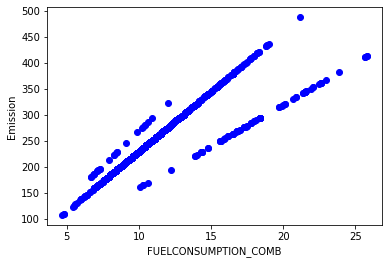

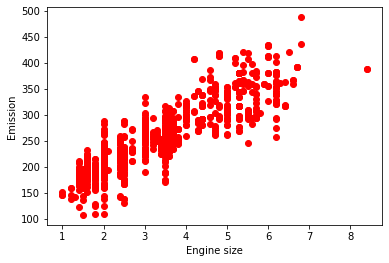

In [15]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


Creating train and test data

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Train data distribution

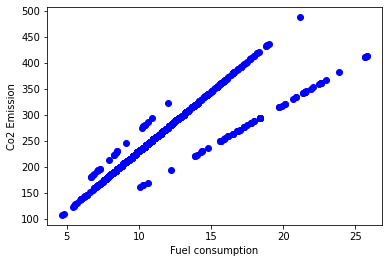

In [17]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'b')
plt.xlabel('Fuel consumption')
plt.ylabel('Co2 Emission')
plt.show()

Simple linear regression model

In [18]:
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[39.1932831]]
Intercept:  [125.19213357]


Plot output

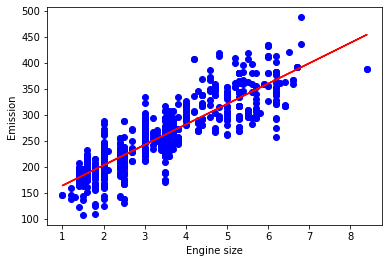

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Multiple linear regression model

In [20]:
reg_mult = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg_mult.fit(train_x,train_y)

print('Coefficients : ', reg_mult.coef_)

Coefficients :  [[10.19896332  8.16166661  9.57265756]]


Polynomial Regression

In [21]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

reg_poly = linear_model.LinearRegression()
reg_poly.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', reg_poly.coef_)
print ('Intercept: ',reg_poly.intercept_)

Coefficients:  [[ 0.         52.35397019 -1.73732087]]
Intercept:  [104.17613538]


Plot results

Text(0, 0.5, 'Emission')

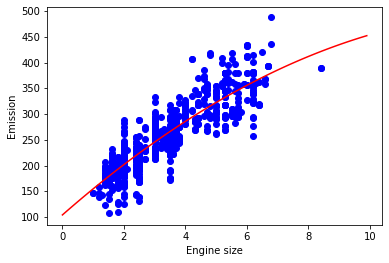

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg_poly.intercept_[0]+ reg_poly.coef_[0][1]*XX+ reg_poly.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation

In [23]:
test_x_poly_ = poly.transform(test_x)
test_y_ = reg_poly.predict(test_x_poly_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.26
Residual sum of squares (MSE): 851.74
R2-score: 0.76
